In [2]:
# Install Required Libraries
!pip install pillow matplotlib


In [7]:
#Import Required Modules

from PIL import Image
import matplotlib.pyplot as plt


In [8]:
#Function to Convert Message to Binary
def message_to_binary(message):
    return ''.join(format(ord(char), '08b') for char in message)


In [10]:
# Function to Encode Message into Image
def encode_message(image_path, message, output_path):
    img = Image.open(image_path)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    
    binary_msg = message_to_binary(message) + '1111111111111110'  # EOF marker
    pixels = list(img.getdata())
    
    new_pixels = []
    msg_index = 0
    
    for pixel in pixels:
        r, g, b = pixel
        if msg_index < len(binary_msg):
            r = (r & ~1) | int(binary_msg[msg_index])
            msg_index += 1
        if msg_index < len(binary_msg):
            g = (g & ~1) | int(binary_msg[msg_index])
            msg_index += 1
        if msg_index < len(binary_msg):
            b = (b & ~1) | int(binary_msg[msg_index])
            msg_index += 1
        new_pixels.append((r, g, b))

    new_img = Image.new(img.mode, img.size)
    new_img.putdata(new_pixels)
    new_img.save(output_path)
    print("✅ Message encoded and saved as:", output_path)


In [4]:
#Function to Decode Message from Image
def decode_message(image_path):
    img = Image.open(image_path)
    pixels = list(img.getdata())
    
    binary_data = ''
    for pixel in pixels:
        for color in pixel[:3]:
            binary_data += str(color & 1)

    # Break into 8-bit chunks
    chars = [binary_data[i:i+8] for i in range(0, len(binary_data), 8)]
    message = ""
    for char in chars:
        if char == '11111110':  # End of message
            break
        message += chr(int(char, 2))

    print("🔍 Hidden Message:", message)


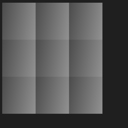

In [11]:
#Upload your input image:
# To preview
from IPython.display import Image as IPImage
IPImage(filename='sample_input.png')  

In [12]:
# Encode message:
encode_message("sample_input.png", "Hello, this is a hidden message!", "output.png")


✅ Message encoded and saved as: output.png


In [13]:
#Decode message:
decode_message("output.png")


🔍 Hidden Message: Hello, this is a hidden message!ÿ


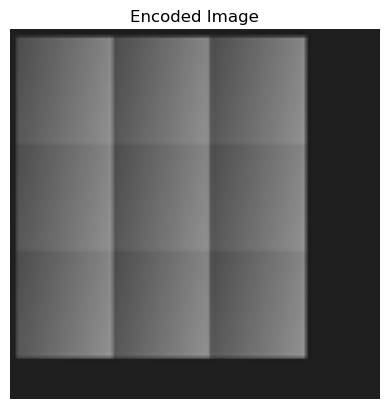

In [14]:
#Show Encoded Image
img = Image.open("output.png")
plt.imshow(img)
plt.axis('off')
plt.title("Encoded Image")
plt.show()
